In [121]:
import os
import pandas as pd
import numpy as np


import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data_utils
import pytorch_lightning as pl

import matplotlib.pyplot as plt
import seaborn as sns

from run import read_data
from config import Config
import src.utils as utils
import pandas as pd
from torch import Tensor
import pytorch_lightning as pl
import torch.utils.data as data_utils
from sklearn.preprocessing import MinMaxScaler
from src.model import SequenceLearner
from torchmetrics.functional.regression import mean_absolute_percentage_error


from ncps.torch import LTC

In [73]:
model_paths = ["checkpoints/" + model for model in os.listdir("checkpoints")]

In [131]:
device = "cpu" 
# data related section
data_raw = read_data(Config.PATH)
data_raw = utils.prepare_data(data_raw, station=Config.STATION, features=Config.FEATURES_LIST)

test_data = data_raw.copy()
test_data = utils.make_features(test_data, features=Config.FEATURES_LIST)

x_features, y_features = utils.generate_test_data(
    test_data,
    Config.FILTER_DT_TILL,
    features=Config.FEATURES_LIST,
    push_y_by = 60,
    unit = 'd',
)

x_test_scaler = MinMaxScaler()
x_test_scaler, x_features = utils.normalize_data(
    x_test_scaler,
    x_features)

y_test_scaler = MinMaxScaler()
y_test_scaler, y_features = utils.normalize_data(
    y_test_scaler,
    y_features)

out_features = y_features.shape[-1]
in_features = x_features.shape[-1]

ds = data_utils.TensorDataset(
    Tensor(x_features), Tensor(y_features)
)

dataloader = data_utils.DataLoader(
    ds,
    batch_size=Config.BATCH_SIZE,
    num_workers=Config.NUM_WORKERS,
    shuffle=False, 
)

prediction = {}
mapes = {}
for path in model_paths:
    model = SequenceLearner.load_from_checkpoint(path).model.to(device).eval()
    try:
        prediction[path] = model(Tensor(x_features).view(1, -1, in_features).to(device))[0].detach().numpy()
        pred_values = prediction[path]
        tens_pred = torch.from_numpy(pred_values).squeeze(0)
        tens_y = torch.from_numpy(y_features)
        mapes[path] = mean_absolute_percentage_error(tens_pred, tens_y).item()
    except Exception as e:
        prediction[path] = f"error for this model: {e}"
        print("error")
        pass    

C:\Users\VID\AppData\Local\Temp/ipykernel_1571016/1354996545.py:3: DtypeWarning: Columns (15,16,17,18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  data_raw = read_data(Config.PATH)
C:\Users\VID\anaconda3\lib\site-packages\torch\utils\data\dataloader.py:557: UserWarning: This DataLoader will create 128 worker processes in total. Our suggested max number of worker in current system is 20 (`cpuset` is not taken into account), which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
Lightning automatically upgraded your loaded checkpoint from v1.5.0 to v2.4.0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint C:\Users\VID\Desktop\GitHub\ncps-slaf\slaf-project\checkpoints\model-lnn_units=1

error


Lightning automatically upgraded your loaded checkpoint from v1.5.0 to v2.4.0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint C:\Users\VID\Desktop\GitHub\ncps-slaf\slaf-project\checkpoints\model-lnn_units=16-lr=0.0001-num_epochs=10-lnn_modified=True.ckpt`
Lightning automatically upgraded your loaded checkpoint from v1.5.0 to v2.4.0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint C:\Users\VID\Desktop\GitHub\ncps-slaf\slaf-project\checkpoints\model-lnn_units=16-lr=0.0001-num_epochs=50-lnn_modified=False.ckpt`


error
error


Lightning automatically upgraded your loaded checkpoint from v1.5.0 to v2.4.0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint C:\Users\VID\Desktop\GitHub\ncps-slaf\slaf-project\checkpoints\model-lnn_units=16-lr=0.0001-num_epochs=50-lnn_modified=True.ckpt`
Lightning automatically upgraded your loaded checkpoint from v1.5.0 to v2.4.0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint C:\Users\VID\Desktop\GitHub\ncps-slaf\slaf-project\checkpoints\model-lnn_units=16-lr=0.01-num_epochs=10-lnn_modified=False-v1.ckpt`


error


Lightning automatically upgraded your loaded checkpoint from v1.5.0 to v2.4.0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint C:\Users\VID\Desktop\GitHub\ncps-slaf\slaf-project\checkpoints\model-lnn_units=16-lr=0.01-num_epochs=10-lnn_modified=False-v2.ckpt`
Lightning automatically upgraded your loaded checkpoint from v1.5.0 to v2.4.0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint C:\Users\VID\Desktop\GitHub\ncps-slaf\slaf-project\checkpoints\model-lnn_units=16-lr=0.01-num_epochs=10-lnn_modified=False-v3.ckpt`
Lightning automatically upgraded your loaded checkpoint from v1.5.0 to v2.4.0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint C:\Users\VID\Desktop\GitHub\ncps-slaf\slaf-project\checkpoints\model-lnn_units=16-lr=0.01-num_epochs=10-lnn_modified=False-v4.ckpt`
Lightning automatically upgraded your

error


Lightning automatically upgraded your loaded checkpoint from v1.5.0 to v2.4.0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint C:\Users\VID\Desktop\GitHub\ncps-slaf\slaf-project\checkpoints\model-lnn_units=16-lr=0.01-num_epochs=10-lnn_modified=True-v2.ckpt`
Lightning automatically upgraded your loaded checkpoint from v1.5.0 to v2.4.0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint C:\Users\VID\Desktop\GitHub\ncps-slaf\slaf-project\checkpoints\model-lnn_units=16-lr=0.01-num_epochs=10-lnn_modified=True-v3.ckpt`
Lightning automatically upgraded your loaded checkpoint from v1.5.0 to v2.4.0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint C:\Users\VID\Desktop\GitHub\ncps-slaf\slaf-project\checkpoints\model-lnn_units=16-lr=0.01-num_epochs=10-lnn_modified=True-v4.ckpt`
Lightning automatically upgraded your lo

error
error


Lightning automatically upgraded your loaded checkpoint from v1.5.0 to v2.4.0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint C:\Users\VID\Desktop\GitHub\ncps-slaf\slaf-project\checkpoints\model-lnn_units=16-lr=0.01-num_epochs=100-lnn_modified=True.ckpt`
Lightning automatically upgraded your loaded checkpoint from v1.5.0 to v2.4.0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint C:\Users\VID\Desktop\GitHub\ncps-slaf\slaf-project\checkpoints\model-lnn_units=16-lr=0.01-num_epochs=50-lnn_modified=False.ckpt`


error
error


Lightning automatically upgraded your loaded checkpoint from v1.5.0 to v2.4.0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint C:\Users\VID\Desktop\GitHub\ncps-slaf\slaf-project\checkpoints\model-lnn_units=16-lr=0.01-num_epochs=50-lnn_modified=True.ckpt`
Lightning automatically upgraded your loaded checkpoint from v1.5.0 to v2.4.0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint C:\Users\VID\Desktop\GitHub\ncps-slaf\slaf-project\checkpoints\model-lnn_units=32-lr=0.0001-num_epochs=10-lnn_modified=False.ckpt`


error


Lightning automatically upgraded your loaded checkpoint from v1.5.0 to v2.4.0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint C:\Users\VID\Desktop\GitHub\ncps-slaf\slaf-project\checkpoints\model-lnn_units=32-lr=0.0001-num_epochs=10-lnn_modified=True.ckpt`
Lightning automatically upgraded your loaded checkpoint from v1.5.0 to v2.4.0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint C:\Users\VID\Desktop\GitHub\ncps-slaf\slaf-project\checkpoints\model-lnn_units=32-lr=0.01-num_epochs=10-lnn_modified=False.ckpt`
Lightning automatically upgraded your loaded checkpoint from v1.5.0 to v2.4.0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint C:\Users\VID\Desktop\GitHub\ncps-slaf\slaf-project\checkpoints\model-lnn_units=32-lr=0.01-num_epochs=10-lnn_modified=True.ckpt`
Lightning automatically upgraded your loaded c

In [172]:
pd.set_option("display.max_colwidth", None)
errors_while_loading = ["error" for key, value in prediction.items() if "error" in value]
print("predictions: ", len(prediction))
print("errors: ", len(errors_while_loading))

mape_results = pd.DataFrame(mapes, index=[0]).T.rename(columns={0: "MAPE"}).sort_values(by="MAPE").reset_index()
print(mape_results)

print(mape_results.iloc[0])
print(mape_results.iloc[1]["index"])

predictions:  30
errors:  10
                                                                                index  \
0      checkpoints/model-lnn_units=16-lr=0.01-num_epochs=10-lnn_modified=True-v4.ckpt   
1         checkpoints/model-lnn_units=32-lr=0.01-num_epochs=10-lnn_modified=True.ckpt   
2        checkpoints/model-lnn_units=8-lr=0.0001-num_epochs=10-lnn_modified=True.ckpt   
3    checkpoints/model-lnn_units=16-lr=0.0001-num_epochs=10-lnn_modified=True-v1.ckpt   
4     checkpoints/model-lnn_units=16-lr=0.01-num_epochs=10-lnn_modified=False-v1.ckpt   
5       checkpoints/model-lnn_units=8-lr=0.0001-num_epochs=10-lnn_modified=False.ckpt   
6        checkpoints/model-lnn_units=32-lr=0.01-num_epochs=10-lnn_modified=False.ckpt   
7     checkpoints/model-lnn_units=16-lr=0.01-num_epochs=10-lnn_modified=False-v3.ckpt   
8     checkpoints/model-lnn_units=16-lr=0.01-num_epochs=10-lnn_modified=False-v5.ckpt   
9     checkpoints/model-lnn_units=16-lr=0.01-num_epochs=10-lnn_modified=False-v4.

C:\Users\VID\AppData\Local\Temp/ipykernel_1571016/3549260417.py:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  errors_while_loading = ["error" for key, value in prediction.items() if "error" in value]


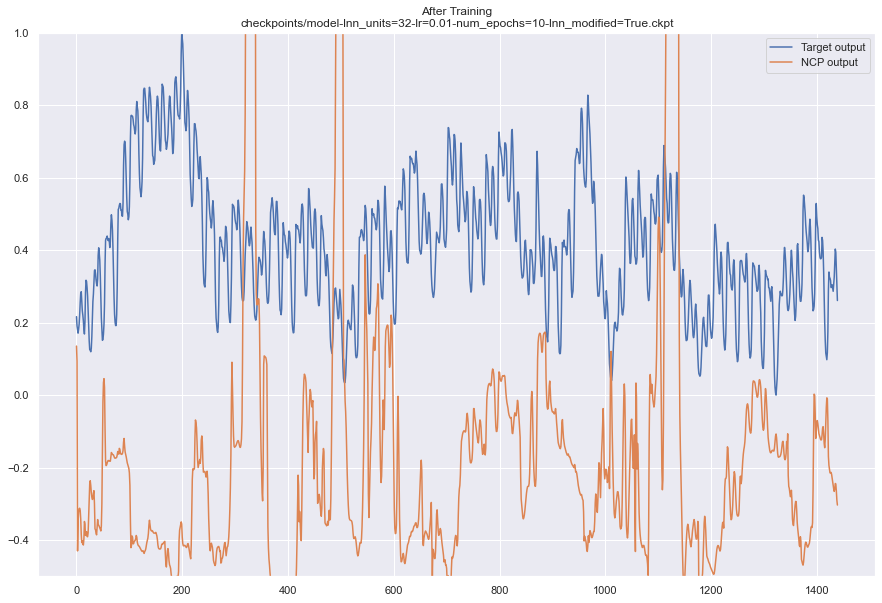

In [168]:
# for key, value in prediction.items():
#     if "error" in value:
#         pass 
#     else:
#         name = "checkpoints_plots/" + key.split("/")[1] + ".png"
#         sns.set_theme()
#         plt.figure(figsize=(15, 10))
#         plt.plot(y_features[:, 0], label="Target output")
#         plt.plot(value[0, :, 0], label="NCP output")

#         plt.title(f"After Training\n{name}")
#         plt.legend(loc="upper right")
#         plt.savefig(name)
#         plt.close()
        
value = prediction[mape_results.iloc[1]["index"]]
name = str(mape_results.iloc[1]["index"])
sns.set_theme()
plt.figure(figsize=(15, 10))
plt.plot(y_features[:, 0], label="Target output")
plt.plot(value[0, :, 0], label="NCP output")
plt.ylim([-0.5,1])

plt.title(f"After Training\n{name}")
plt.legend(loc="upper right")
# plt.savefig(name)
